In [1]:
import pandas as pd
import numpy as np
import preprocessingFuncts as pp
from sklearn import neighbors
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [2]:
#all base datas

def readData(paths, base='', categories=[]):
  arr = []
  itemData = pp.readItemData()
  userData = pp.readUserData()
  for path in paths:
    ratingData = pp.readRatingData(path)
    data = 0
    if base == "user":
      data = pp.specifyByUserData(userData, ratingData, categories)
    elif base == "item":
      data = pp.specifyByItemData(itemData, ratingData, categories)
    else:
      data = ratingData
    data = data.dropna()
    y = data.loc[:, 'rating']
    x = data.copy()
    x = x.drop(['rating'], axis='columns')
    arr.append({'x': x, 'y': y, 'name': path[8:10], 'type': path[-4:]})
  return arr

In [3]:
from models import ItemBasedCF

#Creating the model & training it
IBCF = ItemBasedCF()
IBCF.fit('ml-100k\\ua.base')

In [4]:
#Viewing the data matrix
IBCF.dataMatrix

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
IBCF.simMatrix

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,1.000000,0.234405,0.220399,0.099681,0.392978,NaN,0.220181,0.256044,0.130358,0.160742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.234405,1.000000,0.252444,0.228276,0.221987,NaN,0.169861,0.340345,-0.274889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.220399,0.252444,1.000000,-0.191251,NaN,NaN,0.125420,-0.118587,0.057506,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.099681,0.228276,-0.191251,1.000000,-0.256932,NaN,0.171199,0.290841,0.214934,0.165357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.392978,0.221987,NaN,-0.256932,1.000000,NaN,0.187546,0.215499,0.097367,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Making ratings prediction

testData = pp.readRatingData('ml-100k\\ua.test')
testX, testY =  testData.loc[:,['user_id','item_id']],testData.loc[:,'rating']

predY = IBCF.predict(testX)
print(predY)

[5, 4, 5, 3, 4, 4, 5, 4, 4, 3, 4, 4, 4, 4, 4, 4, 5, 5, 4, 0, 3, 3, 3, 3, 3, 3, 2, 0, 0, 3, 4, 4, 4, 4, 4, 5, 4, 4, 4, 0, 3, 3, 3, 3, 0, 3, 4, 0, 0, 0, 3, 4, 3, 3, 5, 3, 3, 4, 4, 5, 5, 4, 4, 5, 4, 4, 5, 4, 5, 5, 4, 4, 5, 4, 4, 3, 4, 3, 0, 4, 0, 4, 4, 4, 5, 5, 4, 4, 5, 0, 4, 0, 4, 4, 5, 4, 5, 5, 5, 5, 3, 0, 4, 3, 4, 4, 0, 0, 4, 4, 5, 5, 4, 4, 5, 4, 4, 5, 4, 5, 3, 2, 3, 4, 3, 3, 5, 0, 4, 0, 4, 4, 4, 5, 3, 4, 5, 4, 5, 5, 2, 3, 3, 3, 4, 3, 1, 2, 4, 2, 4, 5, 4, 4, 4, 4, 5, 5, 4, 5, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 4, 4, 0, 3, 4, 5, 4, 4, 3, 0, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 4, 4, 0, 3, 3, 3, 3, 0, 0, 4, 5, 0, 3, 3, 5, 3, 2, 0, 0, 2, 4, 0, 4, 4, 4, 4, 4, 4, 3, 4, 4, 0, 5, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 4, 3, 3, 0, 3, 3, 3, 0, 0, 4, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 0, 3, 4, 3, 0, 4, 4, 4, 4, 4, 4, 0, 3, 0, 3, 4, 4, 3, 4, 5, 4, 4, 3, 4, 0, 3, 3, 4, 3, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 1, 5, 1, 

In [7]:
from sklearn.metrics import classification_report

print(classification_report(testY, predY))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.43      0.02      0.05       542
           2       0.26      0.11      0.15       995
           3       0.34      0.37      0.35      2424
           4       0.40      0.55      0.46      3316
           5       0.47      0.19      0.28      2153

    accuracy                           0.34      9430
   macro avg       0.32      0.21      0.22      9430
weighted avg       0.39      0.34      0.34      9430



c:\Users\scarl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


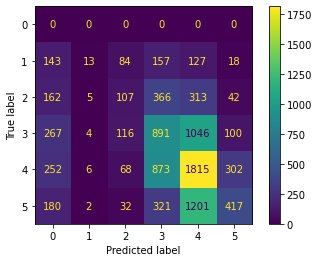

In [9]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(
    testY,predY, labels = [0,1,2,3,4,5]
)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5])
disp.plot()
plt.show()

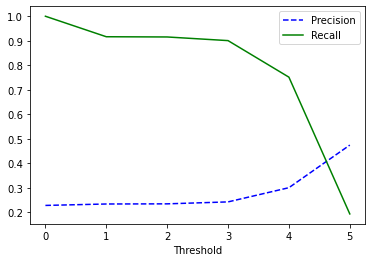

In [36]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(
    testY, predY, pos_label=5)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.legend()
plt.xlabel("Threshold")
plt.show()


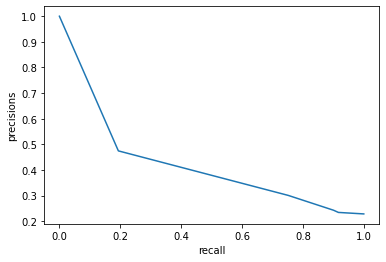

In [40]:
plt.plot(recalls,precisions)
plt.ylabel("precisions")
plt.xlabel("recall")
plt.show()

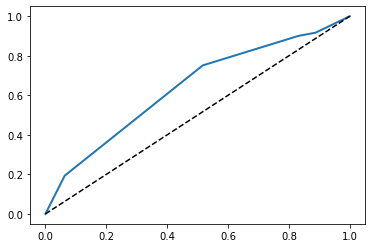

In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(testY, predY, pos_label=5)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel()
plt.show()